<a href="https://colab.research.google.com/github/msherif104/Customer-Segmentation-Project/blob/main/Customer_Segmentation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
df = pd.read_csv("marketing_campaign.csv", sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [24]:
df = df.drop(columns=["ID"])
display(df.head())

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [25]:
#df.isnull().sum()

#checking null values
df.isnull().sum()

,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0
MntFruits,0


In [26]:
#filling null values with the median
df["Income"] = df["Income"].fillna(df["Income"].median())
df.isnull().sum()

,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0
MntFruits,0


In [27]:
x = df["Year_Birth"].min()
y = df["Year_Birth"].max()
print(x,y)

1893 1996


In [28]:
#creating more readable columns
df["Dt_Customer"].min(), df["Dt_Customer"].max()
df["Age"] = 2014 - df["Year_Birth"]
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,57
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,60
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,49
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,30
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,33


In [29]:
#data type optimizing
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y")
latest_date = df["Dt_Customer"].max()
df["Customer_Days"] = (latest_date - df["Dt_Customer"]).dt.days
df = df.drop(columns=["Dt_Customer"])

In [30]:
#optimizing

df['Total_Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

df['Marital_Status'] = df['Marital_Status'].replace({
    'Married': 'Partner', 'Together': 'Partner',
    'Single': 'Alone', 'Divorced': 'Alone', 'Widow': 'Alone',
    'Absurd': 'Alone', 'YOLO': 'Alone'})

df['Living_With'] = df['Marital_Status'].map({'Partner': 2, 'Alone': 1})
df['Children'] = df['Kidhome'] + df['Teenhome']
df['Family_Size'] = df['Living_With'] + df['Children']

df['Is_Parent'] = np.where(df['Children'] > 0, 1, 0)

df['Education'] = df['Education'].replace({
    'Basic': 'Undergraduate', '2n Cycle': 'Undergraduate',
    'Graduation': 'Graduate', 'Master': 'Postgraduate', 'PhD': 'Postgraduate'})




to_drop = ['Z_CostContact', 'Z_Revenue', 'Marital_Status', 'Living_With', 'Year_Birth']
df_clustering = df.drop(to_drop, axis=1)



df_clustering = pd.get_dummies(df_clustering, columns=['Education'], drop_first=True)






In [31]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,Total_Spent,Living_With,Children,Family_Size,Is_Parent
0,1957,Graduate,Alone,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,57,663,1617,1,0,1,0
1,1954,Graduate,Alone,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,60,113,27,1,2,3,1
2,1965,Graduate,Partner,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,49,312,776,2,0,2,0
3,1984,Graduate,Partner,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,30,139,53,2,1,3,1
4,1981,Postgraduate,Partner,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,33,161,422,2,1,3,1


In [32]:
df_clustering.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Customer_Days,Total_Spent,Children,Family_Size,Is_Parent,Education_Postgraduate,Education_Undergraduate
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,57,663,1617,0,1,0,False,False
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,60,113,27,2,3,1,False,False
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,49,312,776,0,2,0,False,False
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,30,139,53,1,3,1,False,False
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,33,161,422,1,3,1,True,False


In [33]:
df["Education"].unique()

array(['Graduate', 'Postgraduate', 'Undergraduate'], dtype=object)

In [34]:
#scaling data to treat features equally

scaler = StandardScaler()
scaled = scaler.fit_transform(df_clustering)


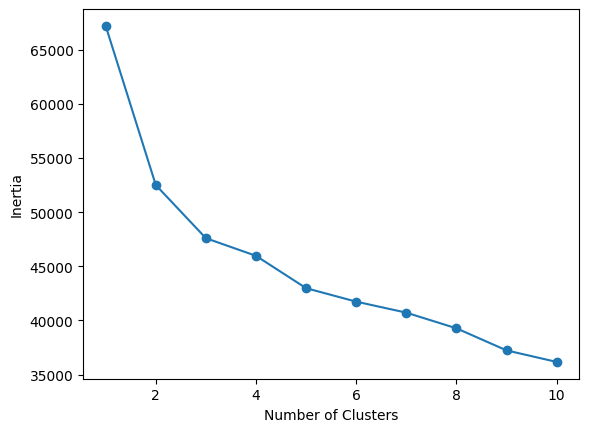

In [35]:
#elbow method for choosing number of clusters

inertia = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(scaled)
  inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()



In [36]:
#creating the clusters

kmeans = KMeans(n_clusters=4, random_state=42)


kmeans.fit(scaled)

df['Cluster'] = kmeans.labels_

print(df['Cluster'].value_counts())

Cluster
2    821
0    643
3    588
1    188
Name: count, dtype: int64


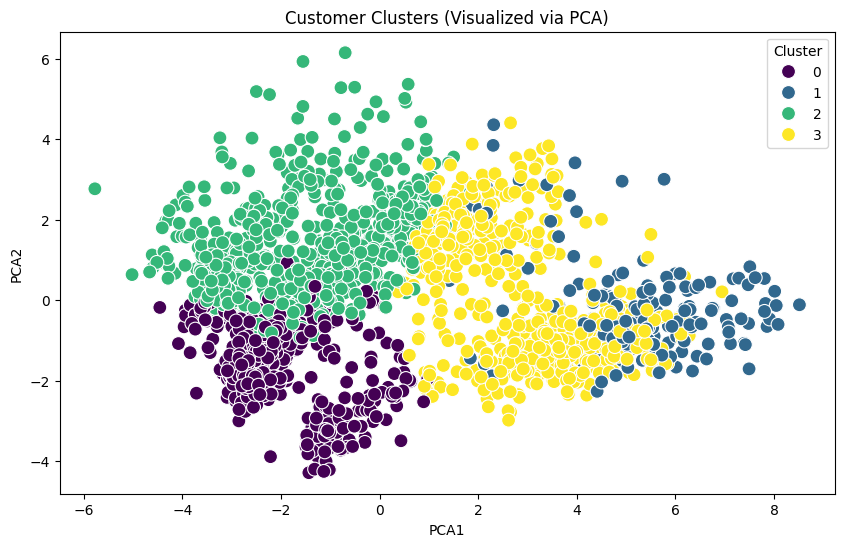

In [37]:
#pca for better visualizing

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled)

df_plot = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
df_plot['Cluster'] = df['Cluster']

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_plot, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Clusters (Visualized via PCA)')
plt.show()

In [38]:
#group by the cluster and calculate the mean for important variables
profile = df.groupby('Cluster')[['Income',
    'Age',
    'Family_Size',
    'Is_Parent',
    'Total_Spent',
    'MntWines',
    'MntMeatProducts',
    'MntGoldProds',
    'NumWebPurchases',
    'NumStorePurchases',
    'NumCatalogPurchases',
    'NumDealsPurchases',
    'NumWebVisitsMonth',
    'Recency',
    'Customer_Days',
    'Response']].mean()

print(profile)

               Income        Age  Family_Size  Is_Parent  Total_Spent  \
Cluster                                                                 
0        31084.733281  37.604977     2.489891   0.799378    99.544323   
1        81203.026596  44.696809     1.792553   0.127660  1626.877660   
2        48930.496346  50.003654     3.272838   1.000000   362.258222   
3        70726.998299  46.937075     2.020408   0.413265  1172.982993   

           MntWines  MntMeatProducts  MntGoldProds  NumWebPurchases  \
Cluster                                                               
0         33.217729        25.542768     17.958009         2.158631   
1        859.792553       481.473404     78.909574         5.462766   
2        236.243605        63.359318     32.774665         4.146163   
3        516.768707       365.661565     77.073129         5.664966   

         NumStorePurchases  NumCatalogPurchases  NumDealsPurchases  \
Cluster                                                         